### Datasheet Ultrasonic sensor (HY-SRF05)

#### Generali
I dettagli significativi sono i seguenti:
- Sound Frequency: 40 kHz
- Measurament range: 2cm to 4.5m
- Measurament resolution: 0.3cm

#### Oscillatori
- L'oscillatore T si occupa di trasmettere un segnale composto da un treno di 8 impulsi
- L'oscillatore R si occupa di ricevere segnale dopo che questo è rimbalzato in una superficie

Un clock si occupa di misura il tempo di volo, un treno da 8 impulsi è tale perché è riconoscibile da altri segnali


#### Misura:
Invia un impulso di 10 uS al sensore sul pin di trigger. Il sensore invierà automaticamente un'onda a 40 kHz.
- Inizia a monitorare l'uscita dal pin Echo e
- Quando il pin Echo passa ad alto, avvia un timer.
- Quando il pin Echo passa ad basso, registra il tempo trascorso dal timer e utilizza la seguente formula di conversione:

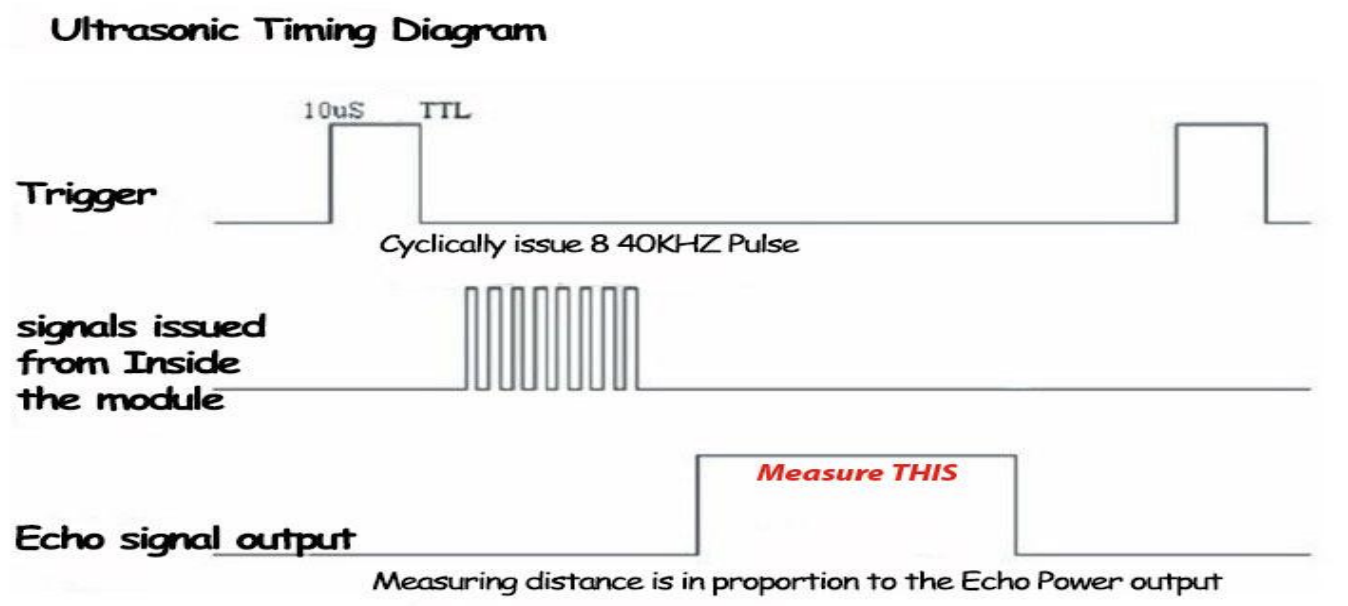

In [ ]:
from IPython.display import Image, display
display(Image("Media/Misura Ultrasonic sensor.png",width=500))

------------
### Datasheet Ultrasonic transducer (SHT-USW-1)

#### Generali

I dettagli significativi sono i seguenti:

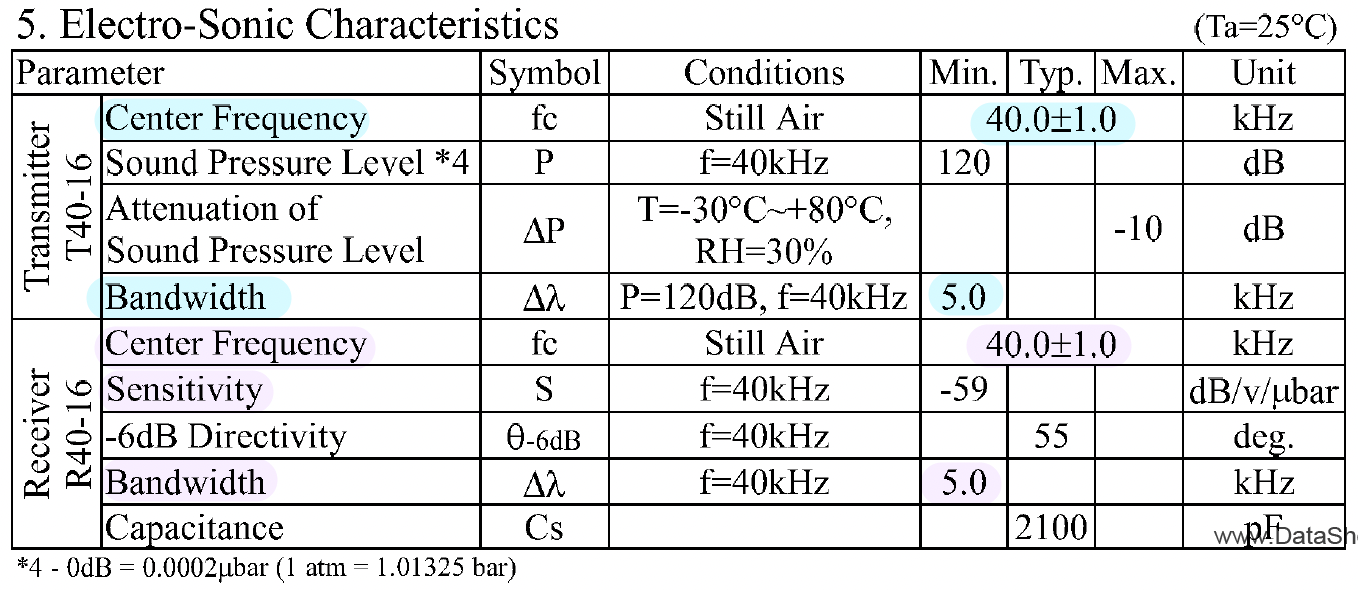

In [6]:
display(Image("Media/Datasheet Ultrasonic transducer.png",width=500))

------